In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [24]:
am=pd.read_csv("./dataset/automobile.csv")
am.head()
# am.columns

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Histograms

Histogram shows us the frequency distribution of a variable. It partitions the spread of numeric data into parts called as "Bins" and then counts the number of data points that fall into each bin. So, the vertical axis actually represents the number of data points in each bin. Let's see an example of this. We will see the distribution of "Peak-rpm" using histogram.

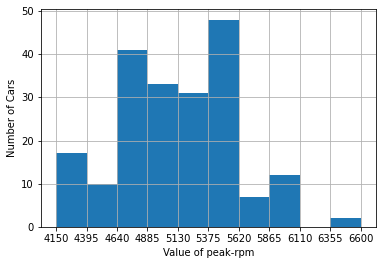

In [25]:
count,bin_edges=np.histogram(am["peak-rpm"])
am["peak-rpm"].plot(kind="hist",xticks=bin_edges)
plt.xlabel("Value of peak-rpm")
plt.ylabel("Number of Cars")
plt.grid()
plt.show()

# Grouping of Data

Assume that you want to know the average price of different types of vechicles and observe how they differ according to body styles and number of doors. A nice way to do this would be to group the data according to "Body-style" and Num-of-doors and then see the average price across each category. The groupby() method from pandas library helps us to accomplish this task.

In [26]:
auto_temp=am[["num-of-doors","body-style","price"]]
auto_group=auto_temp.groupby(["num-of-doors","body-style"],as_index=False).mean()
auto_group

,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


The above output tells us that two door hardtop and two door convertibles are the most expensive cars, whereas, four door hatchbacks are the cheapest.

In [27]:
auto_pivot=auto_group.pivot(index="body-style",columns="num-of-doors")
auto_pivot

price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

# Handling missing Values
When no data value is stored for a feature in a particular observation. we say tha feature has missing values. Examining this is important because when some of your data is missing values by applying isnull() method over the dataframe. The isnull() method returns a rectangular grid of boolean values which tells us It a particular cell in the datarame has missing value or not.

As you can see, analyzing a grid of this style to detect missing value is not very convenient, so we will use heatmaps to visually detect these missing values.

# Heatmap
Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. this is a great way to get visual clues about the data. we will generte a heatmap of the output of isnull() in order to detect missing values.

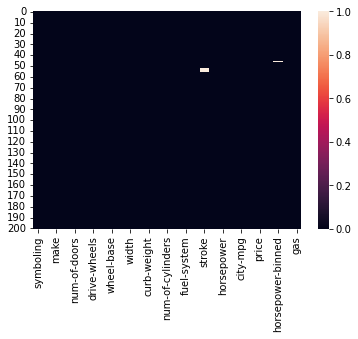

In [28]:
sns.heatmap(am.isnull())
plt.show()

this indicates that "stroke" and "horsepower-binned" columns have few missing values.

# We can handle missing values in many ways:

Delete : You can delete the rows with the missing values or delete the whole column which has missing values. The dropna() method from pandas library cab be used to accomplish this task.

Impute : Deleting data might cause huge amount of information loss. So, replacing data might be a better option than deleting. One Standard replacement technique is to replace missing values with the average value of the entire column. For example, we can replace the missing values in "Stroke" column with the mean value of stroke column.THe fillna() method from pandas library can be used to accomplish this week.

Predictive filling : Alternatively, you can choose to fill missing values through predicitive filling. The interpolate() method will perform a linear interpolation in order to "guess" the missing values and fill the results in the dataset.

In [29]:
auto_missing=am["stroke"].mean()
auto_missing

3.2569035532994857

In [40]:
am["stroke"].fillna(auto_missing,inplace=False)
am.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [13]:
am["horsepower-binned"].unique()

array(['Medium', 'Low', 'High', nan], dtype=object)

In [15]:
am["horsepower-binned"].value_counts()

Low       115
Medium     62
High       23
Name: horsepower-binned, dtype: int64

In [16]:
am["horsepower-binned"].fillna("Low",inplace=True)

# ANOVA(Analysis of Variance)

ANOVA is a statistical method which is used for figuring cut the relations between different groups of categorical data.The ANOVA test, gives us two measures as result:

F-test Score : It calculates the variance between sample group means divided by variation within sample group.

P-Value : It show us the coincidence degree. In other words, it lets us whether the obtained result is statistically significant or not.

Let's take an example to understand this better. The following bar chart shows the average price of different car makes.

In [17]:
auto_temp1=am[["make","price"]]
group1=auto_temp1.groupby(["make"]).mean().sort_values(ascending=False,by="price")

<AxesSubplot:xlabel='make'>

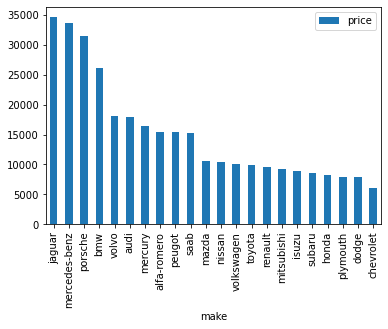

In [18]:
group1.plot.bar()

We can see that the average price of "audi" and "volvo" is almost same. But, the average price of "jaguar" and "honda" differ significantly.

So, we can say that there is very small variance between "audi" and "volvo" because their average price is almost same. While the variance between "jaguar" and "honda" is significantly high. Let's verify this using ANOVA method.

The ANOVA that can be performed using the f_oneway() method from scipy library.

In [19]:
temp_df=am[["make","price"]].groupby(["make"])
temp_df.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
190,volvo,12940.0
191,volvo,13415.0
192,volvo,15985.0
193,volvo,16515.0


In [20]:
stats.f_oneway(temp_df.get_group("audi")["price"],temp_df.get_group("volvo")["price"])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

The result confirms what we guessed at first.

Since the variance between the price of "audi" and "Volvo" is very small, we got a F-test score which is very small (around 0.01)and a p value around 0.9.

Let's do this best once more between "jaguar" and "honda" and see the results.

In [21]:
stats.f_oneway(temp_df.get_group("jaguar")["price"],temp_df.get_group("honda")["price"])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Notice that in this case, we got a very high f-test score(around 401) with a p value around 1.05-10^-11 because, the variance between the average price of "jaguar" and "honda" is huge.